In [114]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: SANTIAGO ANDRES ANGULO TORO - CC 1.001.154.362

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



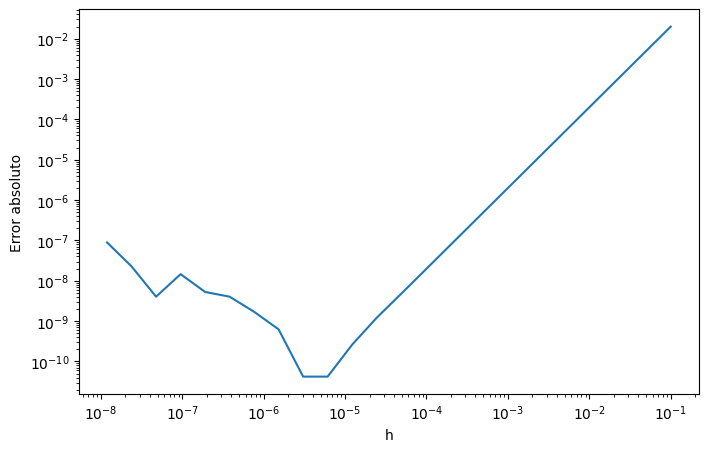

In [115]:
#Para este caso defini b=3 y x=2 o sea f(x) = 3**2
def derivada(b=3, x=2, tol=1e-8, h_inicial=0.1):
    h = h_inicial
    errores = []
    hs = [] #pa almacenar los valores de h en cada iteracion
    derivadas = []

    derivada_real = 3**x * np.log(3)

    while h > tol:
        derivada_aprox = (b**(x + h) - b**(x - h)) / (2 * h)
        error = abs(derivada_aprox - derivada_real)

        errores.append(error)
        hs.append(h)
        derivadas.append(derivada_aprox)

        h /= 2  # Reduzco h

    return hs, derivadas, errores



hs, derivadas, errores = derivada()

# Graficar el error en escala logarítmica
plt.figure(figsize=(8, 5))
plt.loglog(hs,errores)
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.show()

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



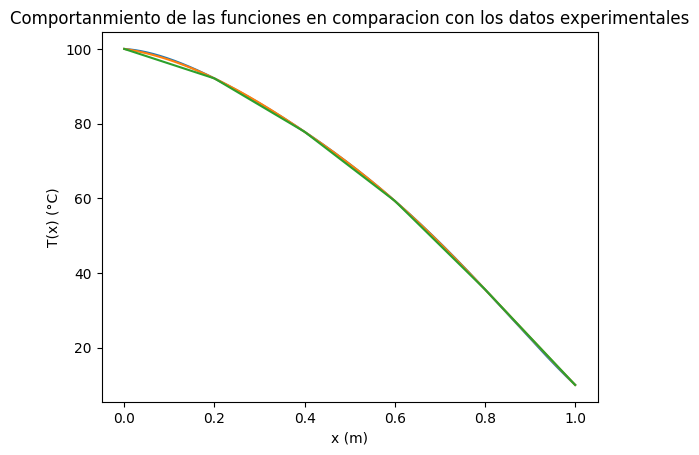

In [116]:
# Datos experimentales
valoresdex = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
valoresdet = np.array([100.0, 92.1, 77.8, 59.3, 35.6, 10.0])

# Polinomio INterpolador de Lagrange
P_lagrange = lagrange(valoresdex, valoresdet)

#Cubicspline
cs = CubicSpline(valoresdex, valoresdet)


x = np.linspace(0, 1, 500)
T_lagrange = P_lagrange(x)
T_spline = cs(x)

#Ahora grafico
plt.plot(x,T_lagrange,label="Polinomio interpolador de Lgrange")
plt.plot(x,T_spline,label="Cubispline")
plt.plot(valoresdex,valoresdet,label="Datos experimentales")
plt.xlabel('x (m)')
plt.ylabel('T(x) (°C)')
plt.title('Comportanmiento de las funciones en comparacion con los datos experimentales')
plt.show()

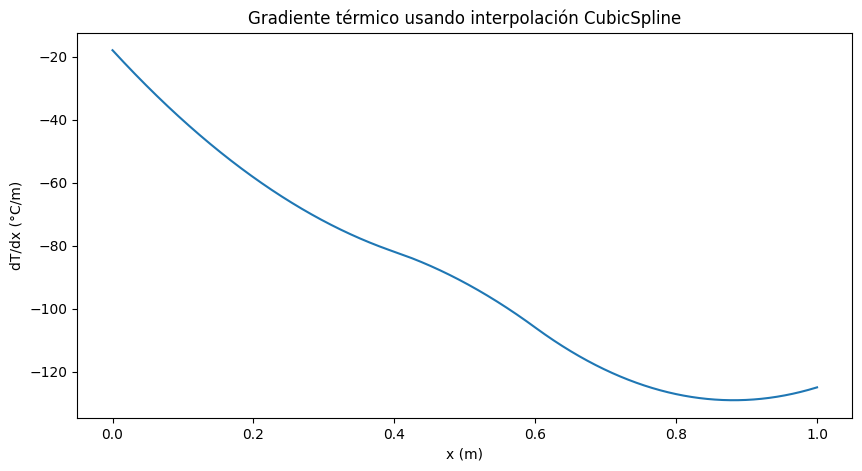

In [117]:
x_gradiente = np.linspace(0, 1, int(1/1e-4))
T_gradiente = cs(x_gradiente)  # Evaluar T(x) usando CubicSpline

# Calcular gradiente térmico
dTdx = np.gradient(T_gradiente, 1e-4)

# Gráfica del gradiente térmico
plt.figure(figsize=(10, 5))
plt.plot(x_gradiente, dTdx, label='Gradiente térmico dT/dx')
plt.xlabel('x (m)')
plt.ylabel('dT/dx (°C/m)')
plt.title('Gradiente térmico usando interpolación CubicSpline')
plt.show()


Text(0.5, 1.0, 'FLujo de calor')

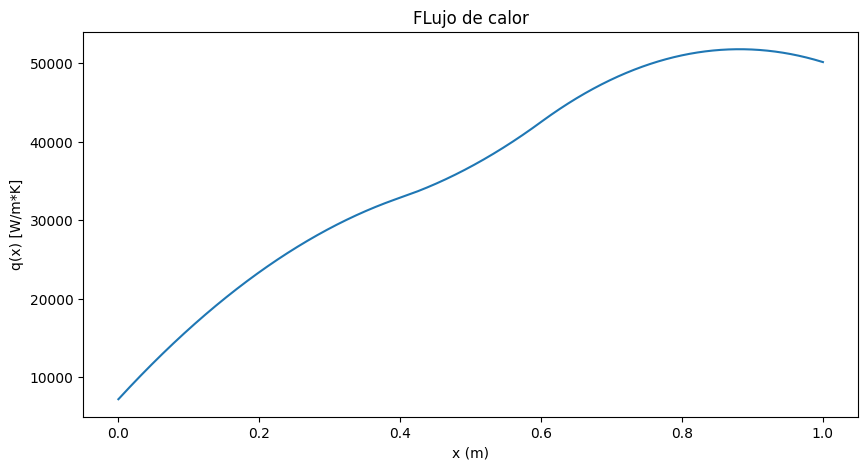

In [118]:
#Determinar el flujo de calor
k=401
q=-k*dTdx


plt.figure(figsize=(10,5))
plt.plot(x_gradiente, q)
plt.xlabel('x (m)')
plt.ylabel('q(x) [W/m*K]')
plt.title('FLujo de calor')

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [119]:
#Calculo de l masa total del sistema usando quad y dblquad
rho=lambda y,x: x*y
def integrando_masa(x):
  return quad(lambda y: rho(y,x),0,3-x)[0]
masa_quad=quad(integrando_masa,0,3)[0]

masa_dblquad = dblquad(rho, 0, 3, lambda x: 0, lambda x: 3 - x)[0]

print("La masa usando quad es:",masa_quad,"y la masa usando dblquad es:", masa_dblquad)

La masa usando quad es: 3.375000000000001 y la masa usando dblquad es: 3.375000000000001


In [120]:
#Calculo del centro de masa de la lamina usando dblquad
My = dblquad(lambda x, y: x**2 * y, 0, 3, lambda x: 0, lambda x: 3 - x)[0]
xbarra = My / masa_dblquad

Mx = dblquad(lambda x,y:x*y**2,0,3, lambda x:0,lambda x:3-x)[0]
ybarra = Mx / masa_dblquad

print("EL centro de masa de la lamina está determinado por:", xbarra, ybarra)

EL centro de masa de la lamina está determinado por: 1.1999999999999997 1.1999999999999997


In [121]:
#Calculo del momento de inercia respecto al eje x
Ix=dblquad(lambda x, y: x * y**3, 0, 3, lambda x: 0, lambda x: 3 - x)[0]
print("El momento de inercia respecto al eje x es:", Ix)

El momento de inercia respecto al eje x es: 6.075000000000001
